In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
NEG_INF = -99

In [3]:
class Env:
    index_to_direction = [
        [ 0,-1],
        [ 0, 1],
        [-1, 0],
        [ 1, 0]]
    
    def __init__(self, n = 5,start_x = 3,start_y = 3,end_states = {(0,0)},random_start = True):
        self.start_x = start_x
        self.start_y = start_y
        self.x = self.start_x
        self.y = self.start_y
        self.n = n
        self.end_states = end_states
        self.random_start = random_start
        
    
    def is_valid(self,x,y):
        if x < 0 or x >= self.n or y < 0 or y >= self.n:
            return False
        return True
    
    def print_hel(self):
        print("hel")
    
    def reset(self):
        if self.random_start:
            self.x = random.randint(0,self.n-1)
            self.y = random.randint(0,self.n-1)
        else:
            self.x = self.start_x
            self.y = self.start_y
        return (self.x,self.y)
    
    def get_all_actions(self):
        return [i for i in range(len(self.index_to_direction))]
    
    def get_actions(self):
        actions = []
        for i in range(len(self.index_to_direction)):
            if self.is_valid(self.x + self.index_to_direction[i][0],self.y + self.index_to_direction[i][1]):
                actions.append(i)
        return actions
        
    def get_random_action(self):
        return random.choice(self.get_actions())
    
    def step(self,action):
        self.x = self.x + self.index_to_direction[action][0]
        self.y = self.y + self.index_to_direction[action][1]
        
        reward = -1
        done = False
        if (self.x,self.y) in self.end_states:
            reward = 0
            done = True
            
        return (self.x,self.y),reward,done,None
            
    

In [38]:

def print_state_action():
    g = []
    for i in range(env.n):
        t = []
        for j in range(env.n):
            t.append(-9999.0)
        g.append(t)

        
    
    for i in range(env.n):
        for j in range(env.n):
            for action in env.get_all_actions():
                sa = ((i,j),action)
                if (sa) in state_action:
                    g[i][j] = max(g[i][j],state_action[sa])
    
    
    for i in range(env.n):
        for j in range(env.n):
            if(g[i][j] == -9999.0):
                g[i][j] = 0
    
    
    
    for i in range(env.n):
        for j in range(env.n):
            print("%-3.2f "%(g[i][j]),end="")
        print()


        
def print_heat_map():
    g = []
    for i in range(env.n):
        t = []
        for j in range(env.n):
            t.append(-9999.0)
        g.append(t)

        
    
    for i in range(env.n):
        for j in range(env.n):
            for action in env.get_all_actions():
                sa = ((i,j),action)
                if (sa) in state_action:
                    g[i][j] = max(g[i][j],state_action[sa])
    
    
    for i in range(env.n):
        for j in range(env.n):
            if(g[i][j] == -9999.0):
                g[i][j] = 0
    
#     for i in range(env.n):
#         for j in range(env.n):
#             print("%-3.2f "%(g[i][j]),end="")
#         print()

    
    a = np.array(g)
    plt.imshow(a, cmap='hot', interpolation='nearest')
    plt.show()

In [5]:

def set_state_action(sa):
    global state_action
    if sa not in state_action:
        state_action[sa] = NEG_INF

def get_action(obs):
    global env
    
    t = random.random()
    if t < exploration:
        return env.get_random_action()
    else:
        act = env.get_random_action()
        val = NEG_INF
        for action in env.get_actions(): 
            sa = (obs,action)
            set_state_action(sa)
            if state_action[sa] > val:
                act = action
                val = state_action[sa]
            
        return act

## This is SARSA
def update_state_action(obs,new_obs,action,reward):
    current_sa = (obs,action)
    set_state_action(current_sa)
    
    next_action = get_action(new_obs)
    next_sa = (new_obs,next_action)
    set_state_action(next_sa)
            
    state_action[current_sa] = state_action[current_sa] + learning_rate*(reward + discount_rate*state_action[next_sa] - state_action[current_sa]) 


    

In [6]:
def train(no_episodes = 10,episode_length = 10):
    global exploration,env

    for ep in range(no_episodes):
        obs = env.reset()
        if obs in env.end_states:
            continue
        for i in range(episode_length):
            action = get_action(obs)
            new_obs, reward, done, _ = env.step(action)
            update_state_action(obs,new_obs,action,reward)
            obs = new_obs
            if done:
                break
                
        exploration = exploration * 0.999

    
    

In [49]:
## (state,action) -> reward
state_action = {}

exploration = 0.7
learning_rate = 1
discount_rate = 1
env = Env(n=15,start_x = 0,start_y = 0,end_states = {(0,0)},random_start=True)

In [50]:
train(2000,50)

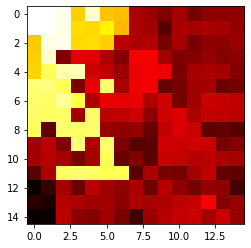

In [51]:
print_heat_map()
# print_state_action()


AttributeError: 'Env' object has no attribute 'print_hel'